In [2]:
import pandas as pd
import numpy as np
import scipy

from SyntheticControlMethods import Synth

import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('data.csv')

In [4]:
data.head()

,Country,Year,"Fertility rate, total (births per woman)",GDP per capita (current US$),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),Civil Liberties
0,Algeria,1968,7.7,281.9,49.6,244.2,2.9,6
1,Algeria,1969,7.7,302.8,50.0,242.0,2.9,6
2,Algeria,1970,7.6,336.2,50.4,238.5,2.8,6
3,Algeria,1971,7.6,341.4,50.8,233.6,2.8,6
4,Algeria,1972,7.6,442.7,51.2,227.5,2.7,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          3924 non-null   object 
 1   Year                                             3924 non-null   int64  
 2   Fertility rate, total (births per woman)         3924 non-null   float64
 3   GDP per capita (current US$)                     3924 non-null   float64
 4   Life expectancy at birth, total (years)          3924 non-null   float64
 5   Mortality rate, under-5 (per 1,000 live births)  3924 non-null   float64
 6   Population growth (annual %)                     3924 non-null   float64
 7   Civil Liberties                                  3924 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 245.4+ KB


In [6]:
#initializing synthetic control
sc=Synth(data, 'GDP per capita (current US$)', 'Country', 'Year', 1979, 'Iraq', random_seed=10, pen='auto' , n_optim=20)

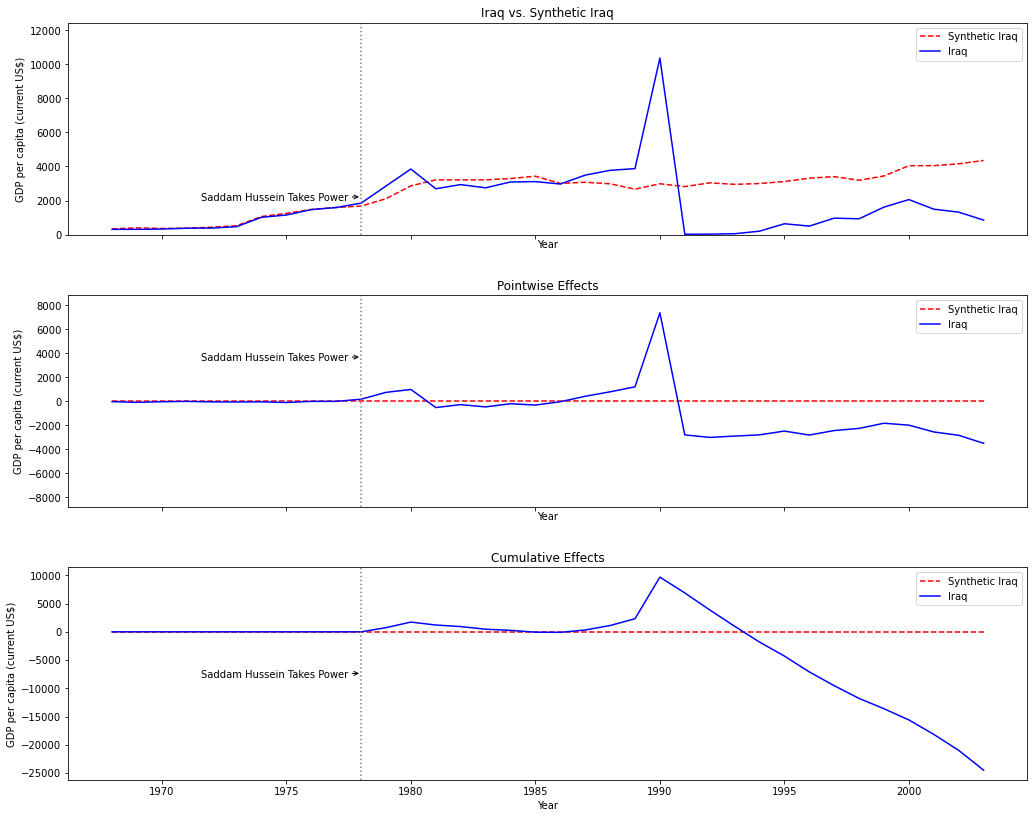

In [7]:
#visualize
sc.plot(['original', 'pointwise','cumulative'], treated_label='Iraq', synth_label='Synthetic Iraq', treatment_label='Saddam Hussein Takes Power')

In [8]:
#Get weight matrix of solution
sc.original_data.weight_df

,Weight
Jordan,0.654375
Oman,0.344727


In [9]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Iraq,71.733483,2458.141002,34.267694


In [10]:
sc.original_data.comparison_df

,Iraq,Synthetic Iraq,WMAPE,Importance
"Fertility rate, total (births per woman)",7.13,7.69,0.56,0.13
GDP per capita (current US$),842.91,865.30,336.45,0.10
"Life expectancy at birth, total (years)",59.64,58.99,3.92,0.07
"Mortality rate, under-5 (per 1,000 live births)",100.05,117.91,46.32,0.18
Population growth (annual %),3.27,4.29,1.01,0.21
Civil Liberties,7.00,6.16,0.84,0.32


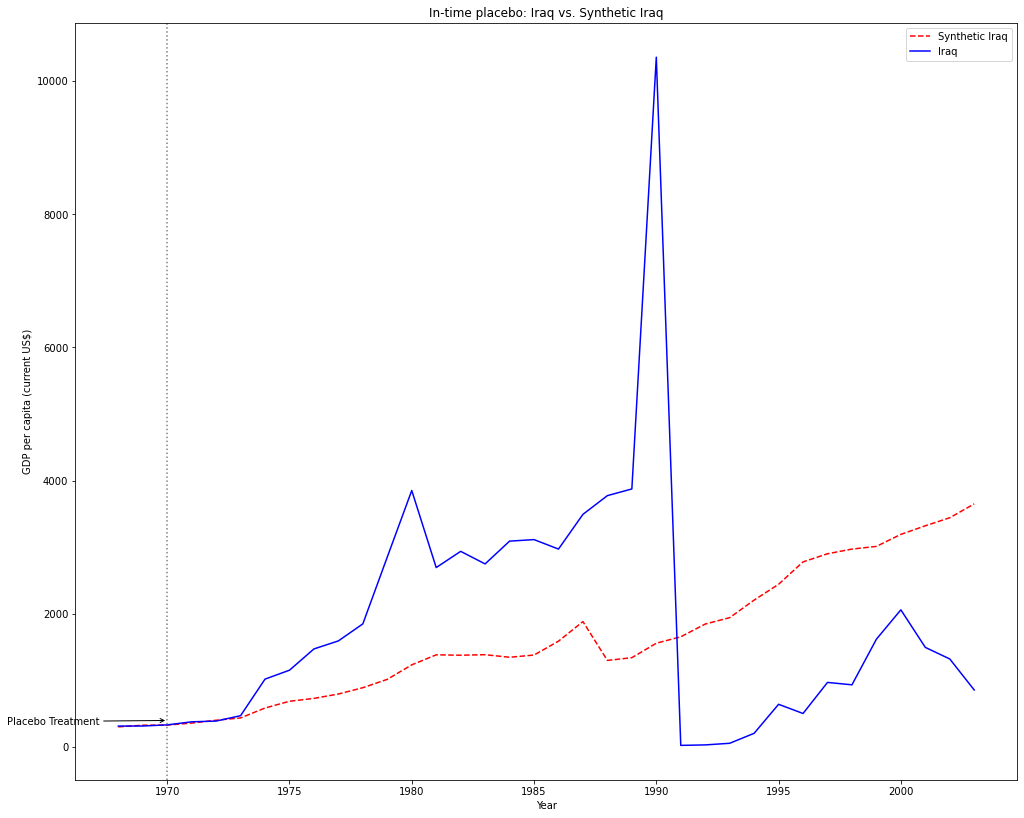

In [11]:
#placebo treatment placed 9 years earlier
sc.in_time_placebo(1970, n_optim=10)

sc.plot(['in-time placebo'], 
            treated_label="Iraq",
            synth_label="Synthetic Iraq")

In [12]:
sc.in_space_placebo(1)

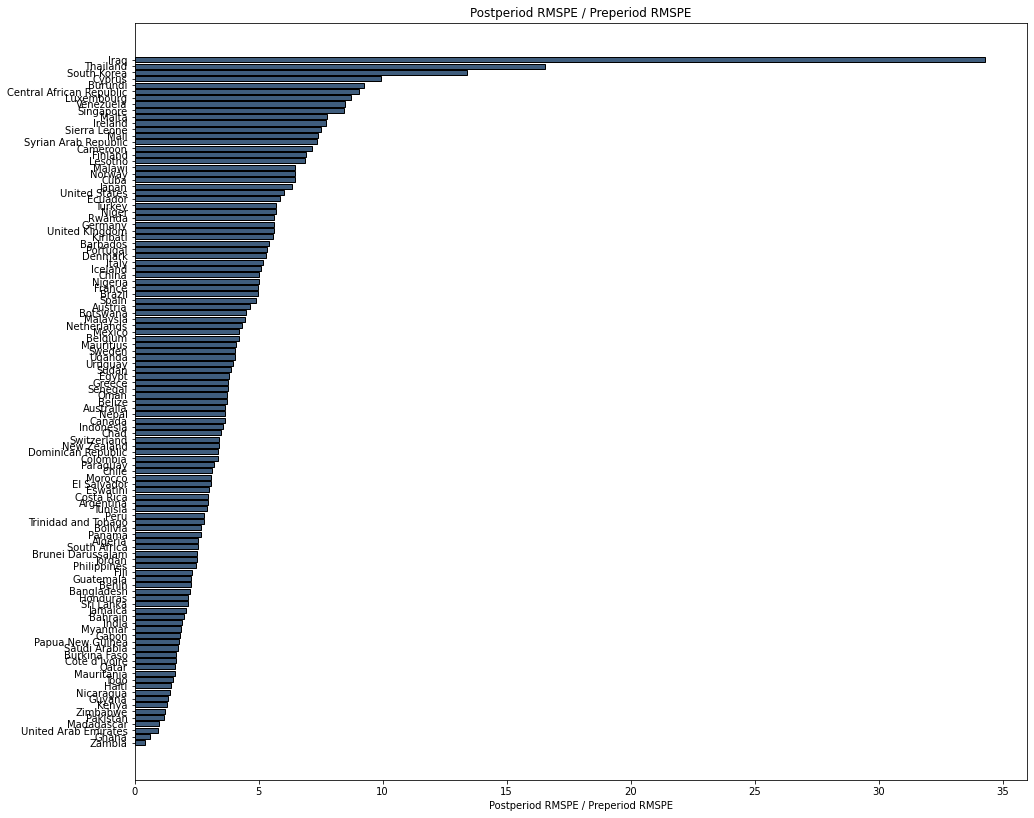

In [13]:
#Visualize
sc.plot(['rmspe ratio'], treated_label='Iraq', synth_label='Synthetic Iraq')

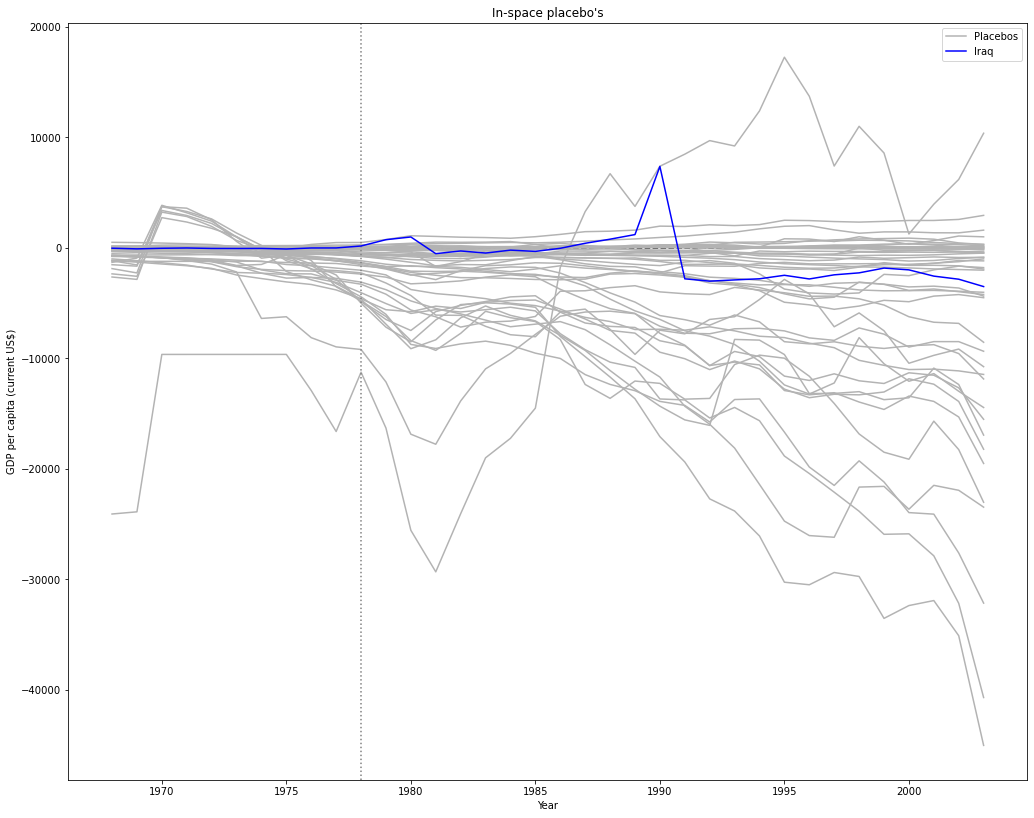

In [14]:
sc.plot(['in-space placebo'], in_space_exclusion_multiple=5, treated_label="Iraq",
            synth_label="Synthetic Iraq")